In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [2]:
base = pd.read_csv('../../Data/BaseData.csv')

In [3]:
X = base.drop(['SalePrice'], axis=1).values
y = base.SalePrice.values

In [4]:
len(y)

2580

In [5]:
X.shape

(2580, 298)

In [6]:
X.shape[1]

298

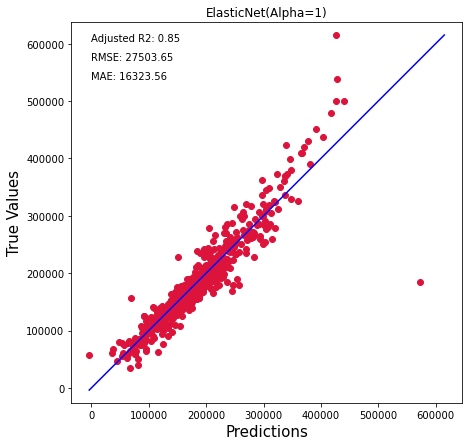

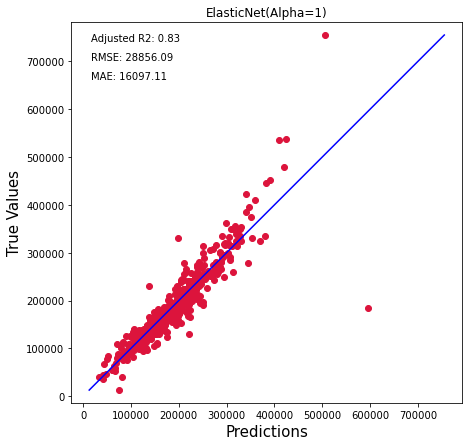

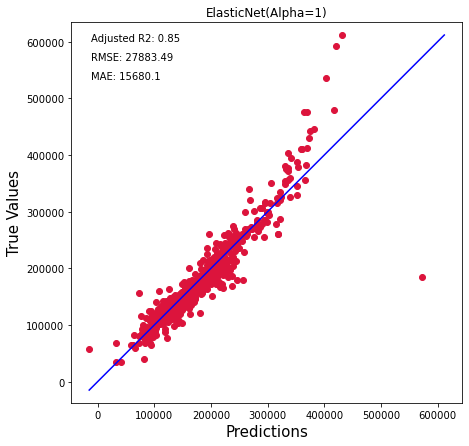

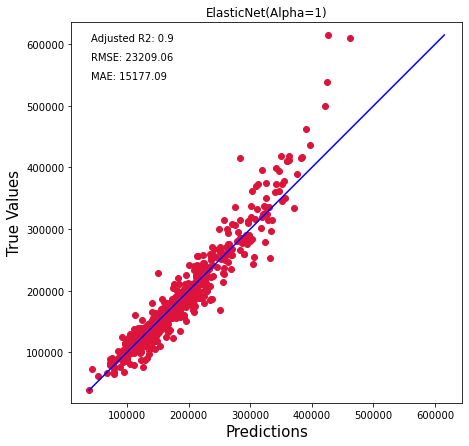

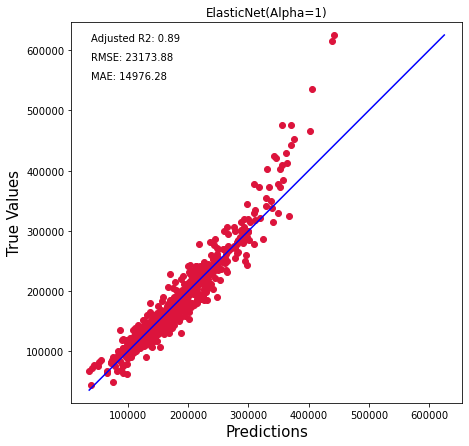

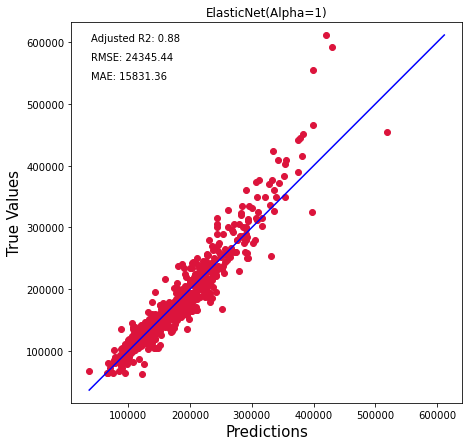

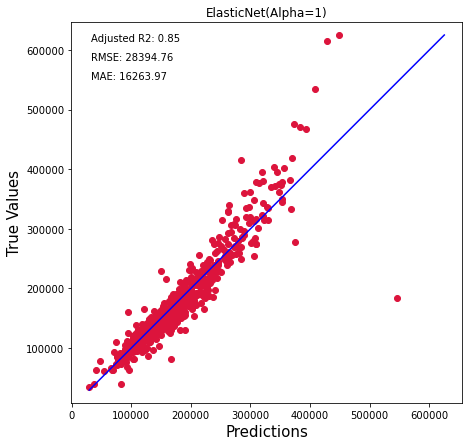

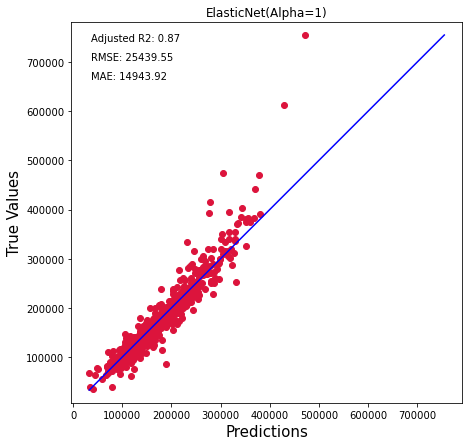

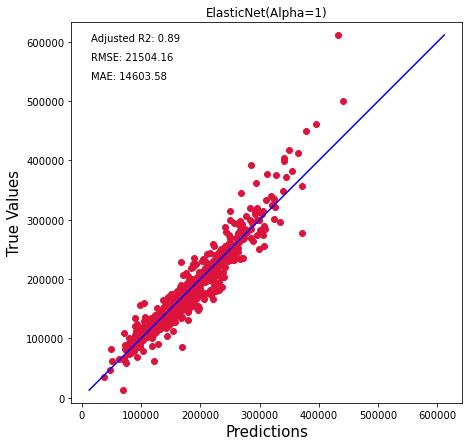

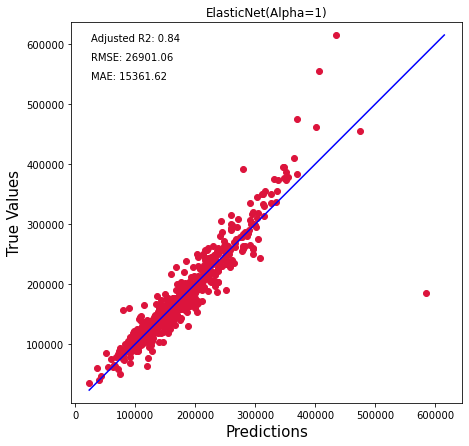

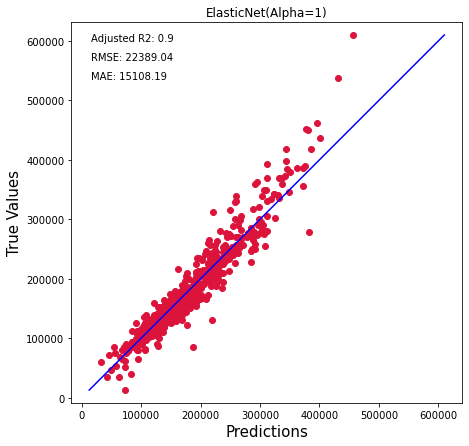

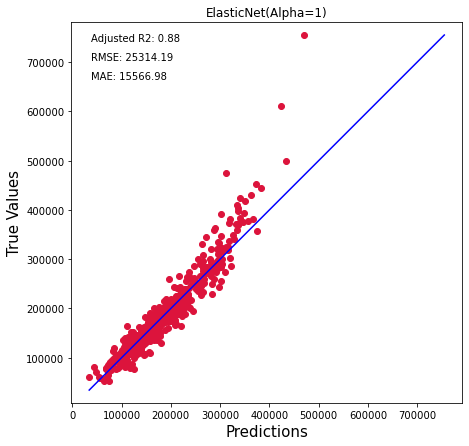

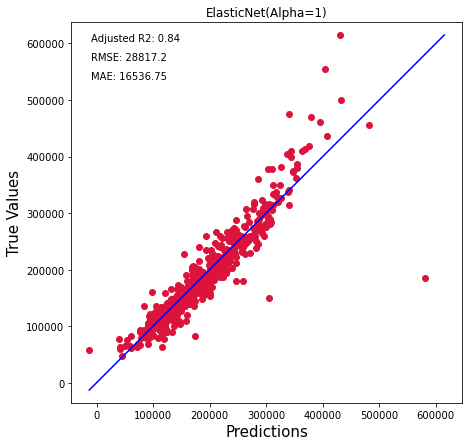

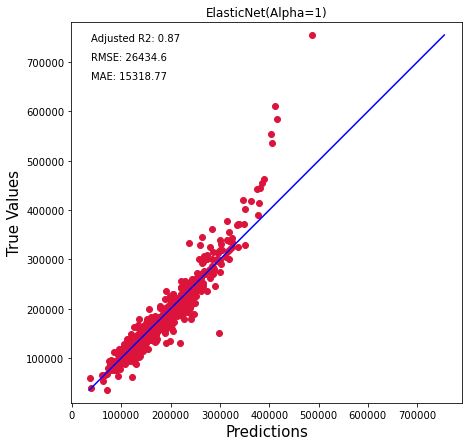

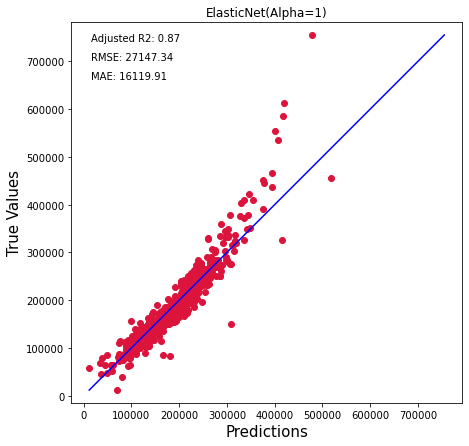

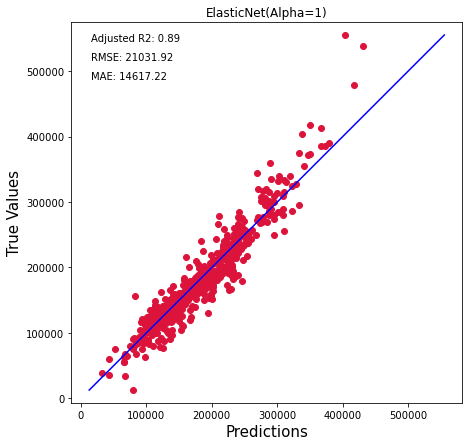

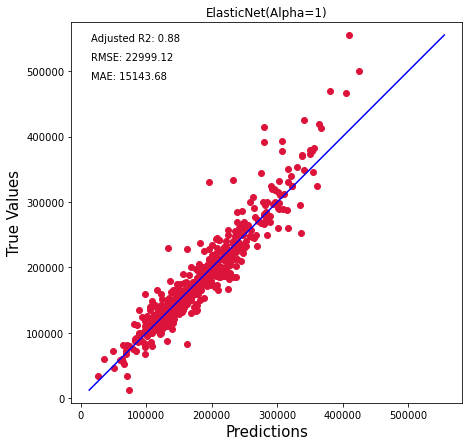

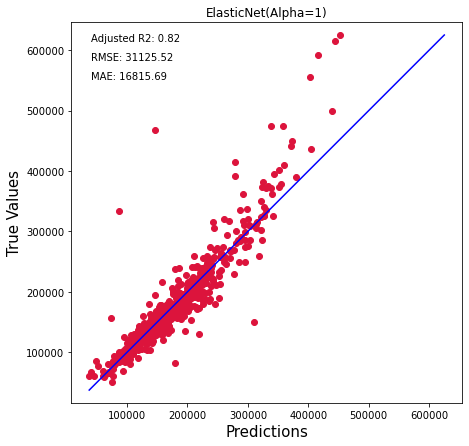

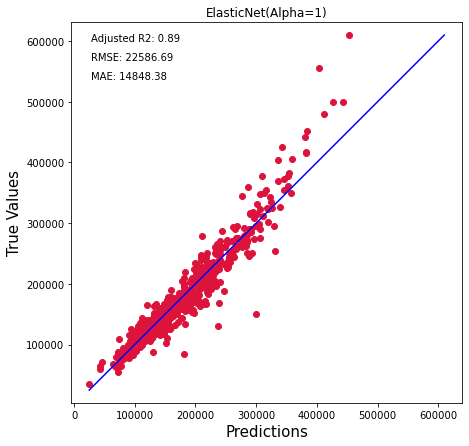

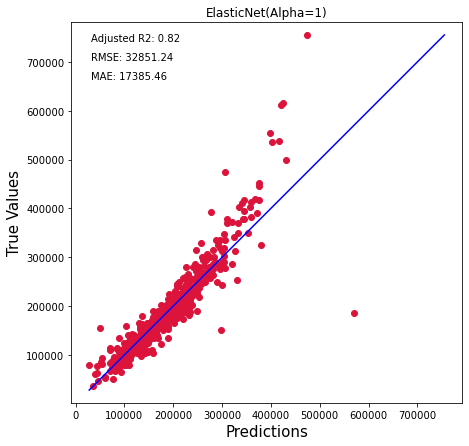

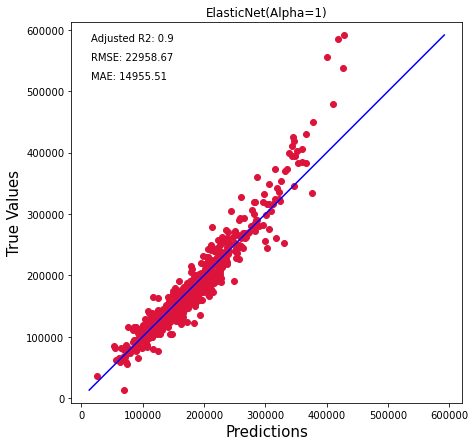

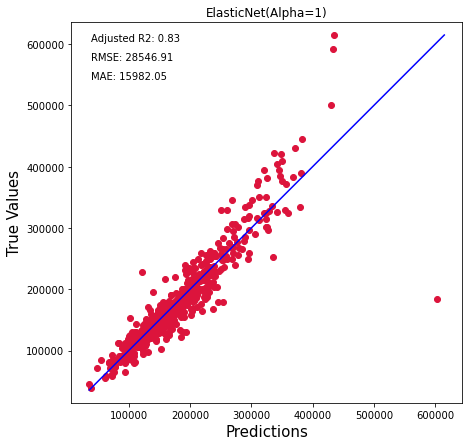

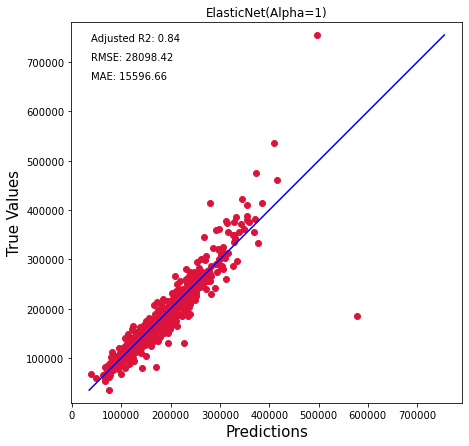

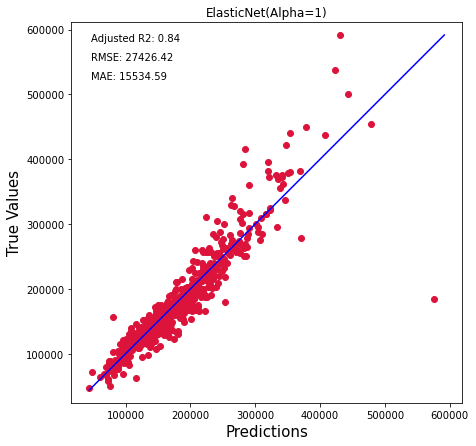

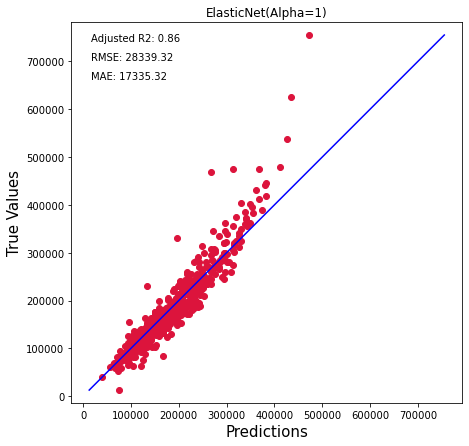

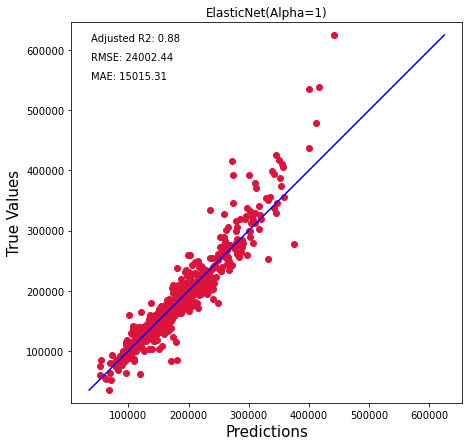

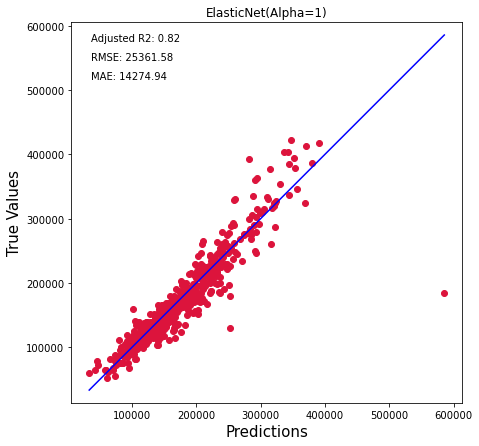

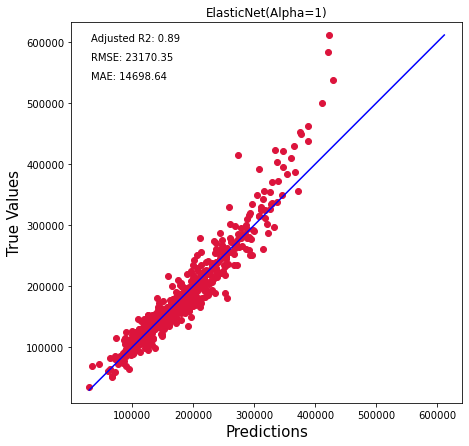

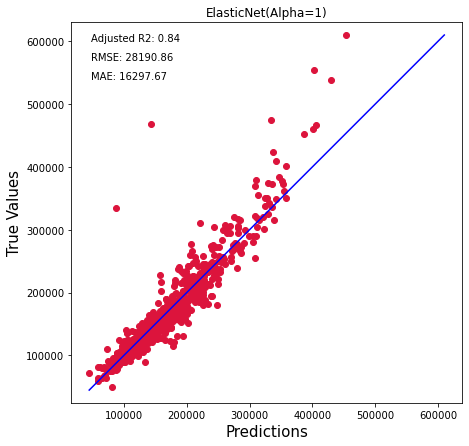

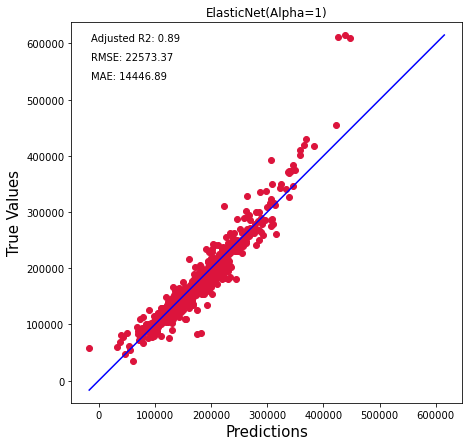

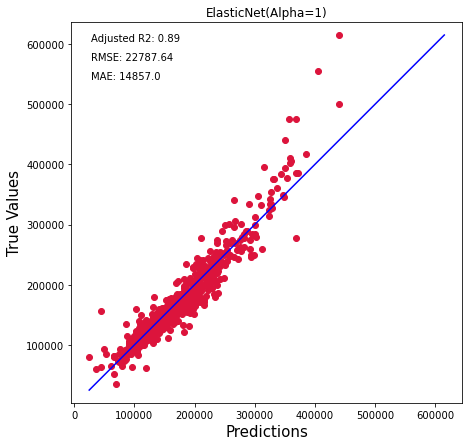

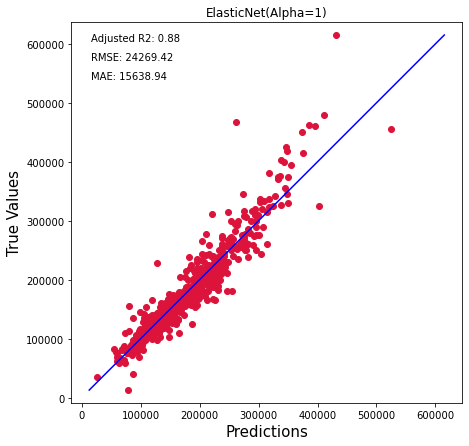

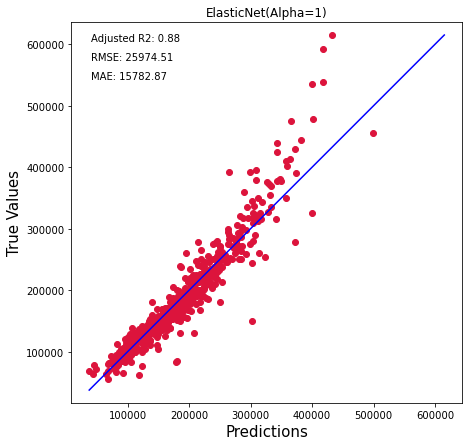

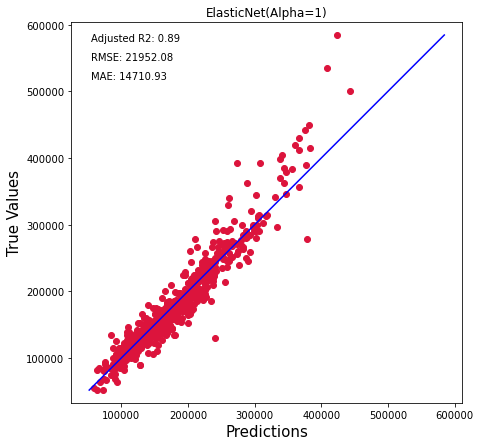

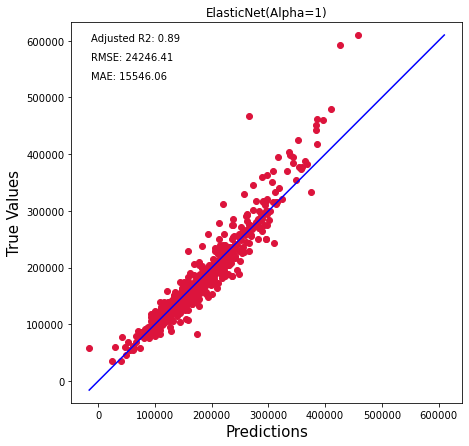

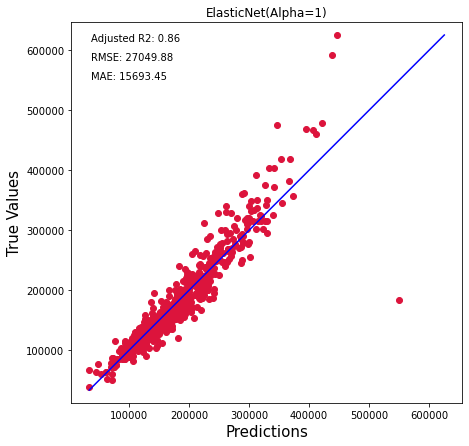

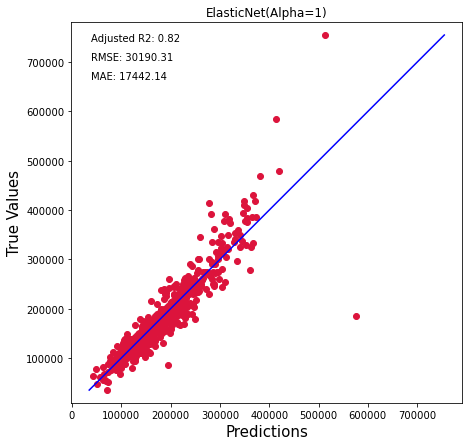

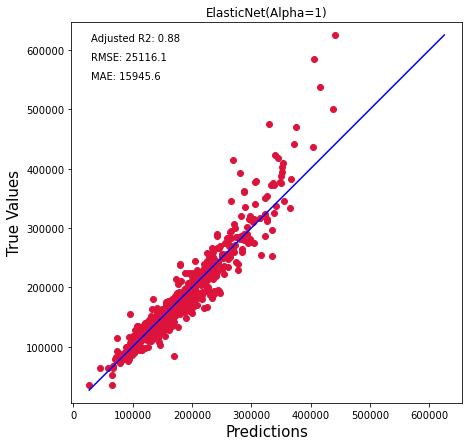

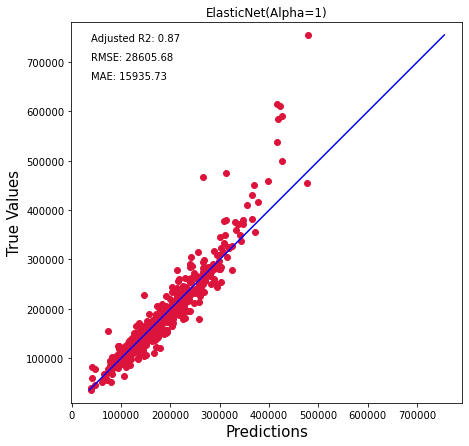

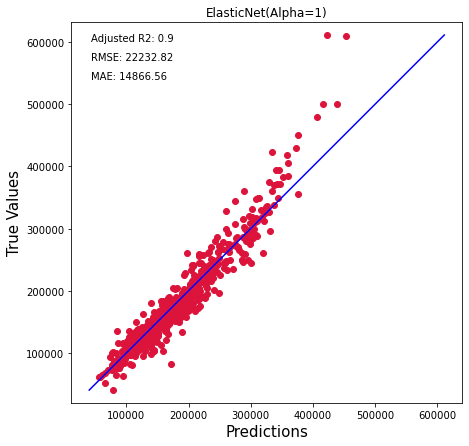

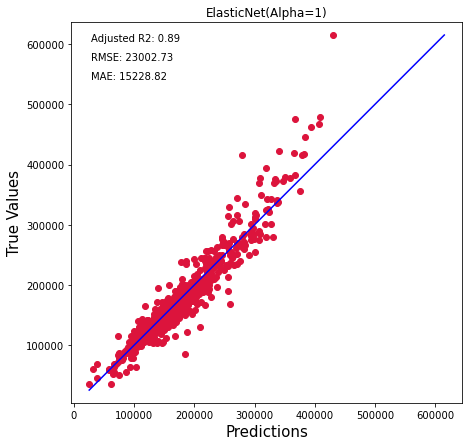

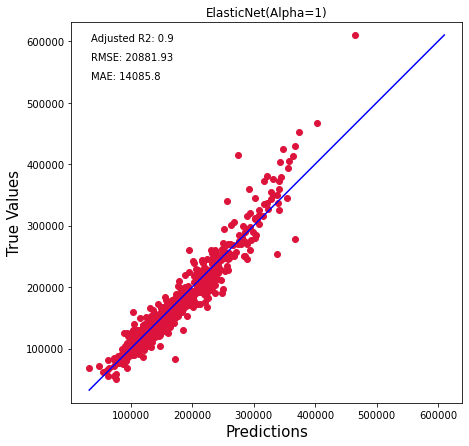

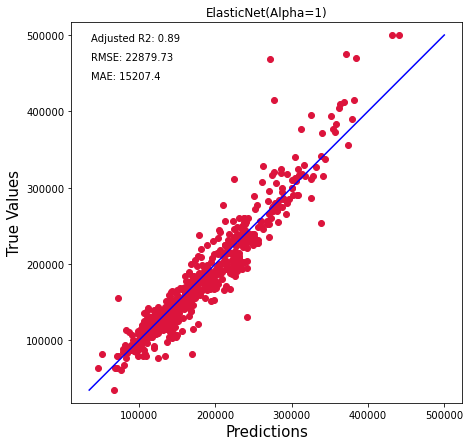

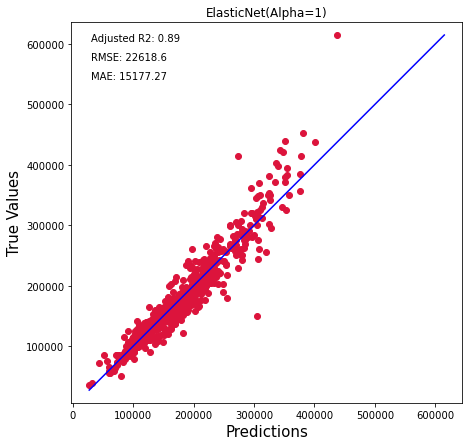

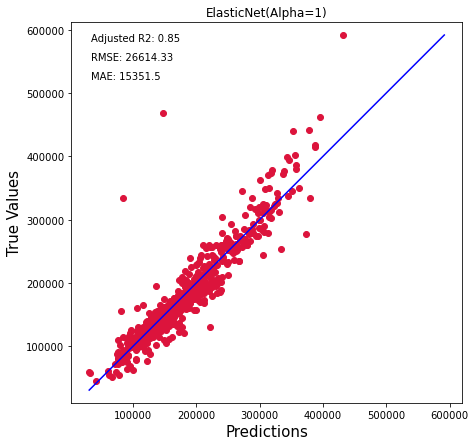

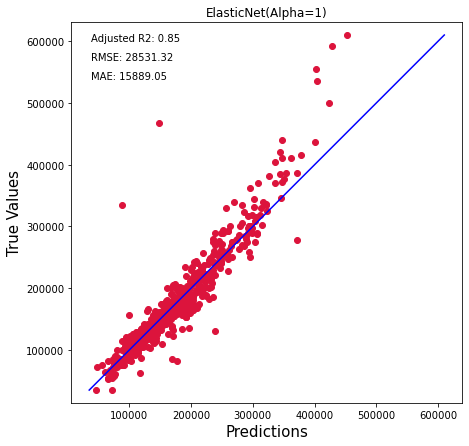

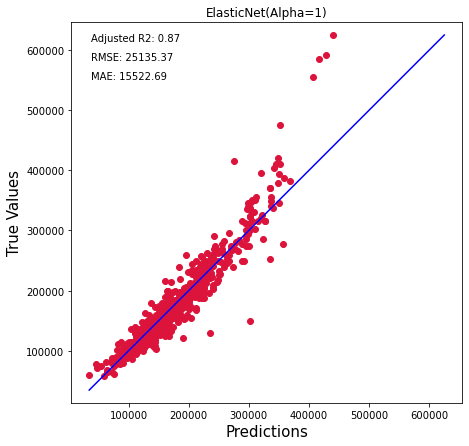

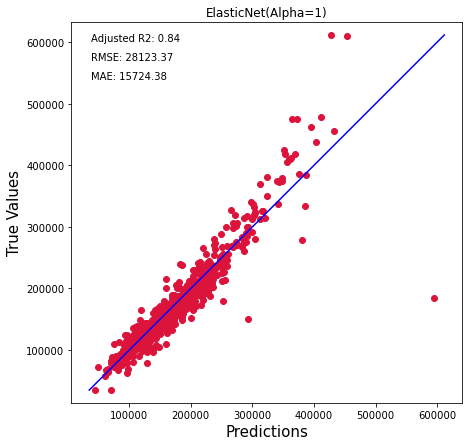

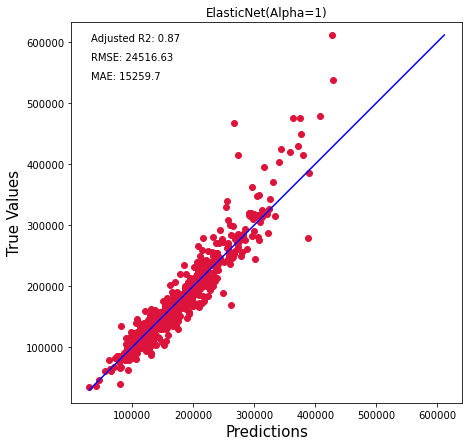

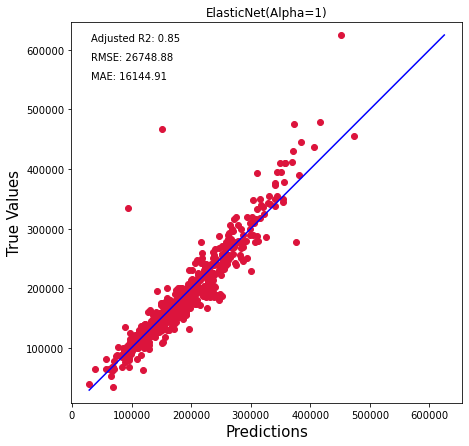

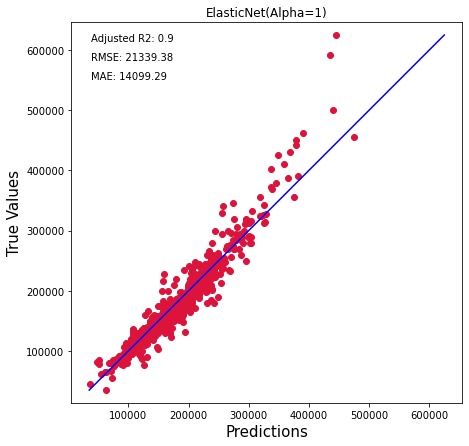

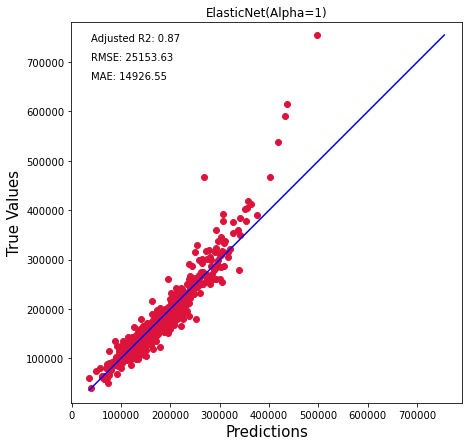

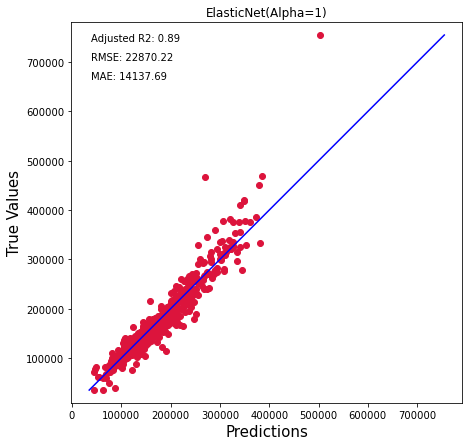

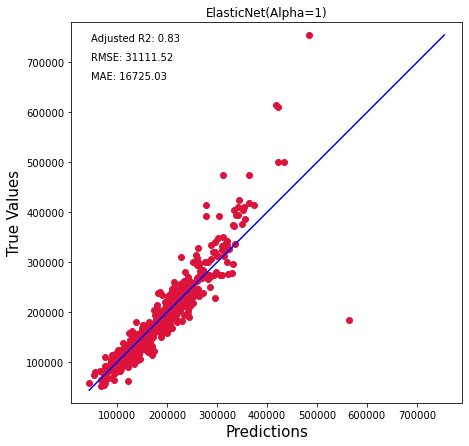

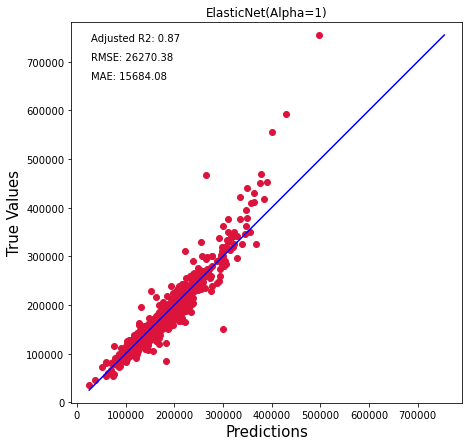

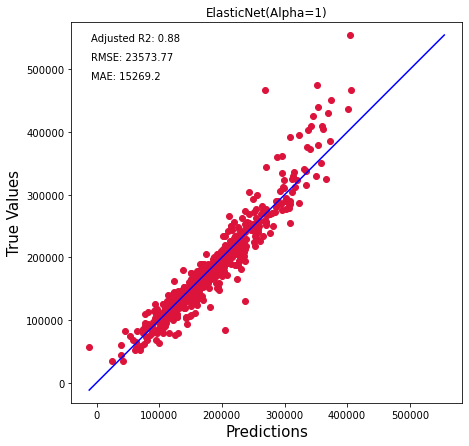

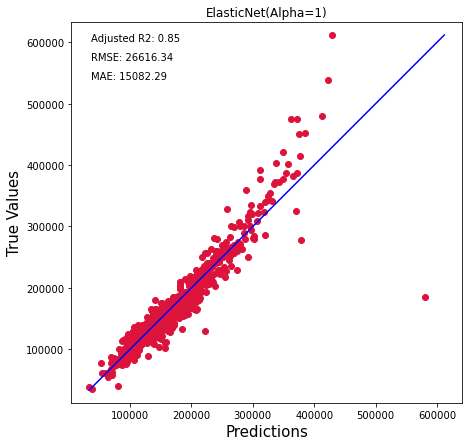

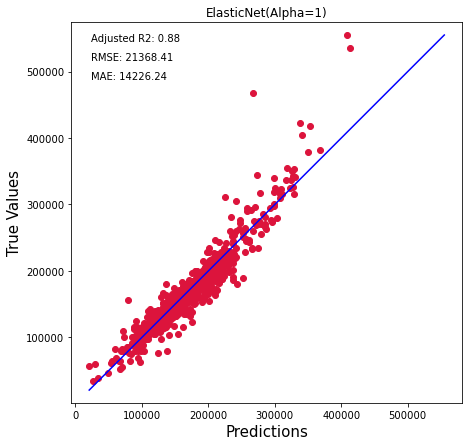

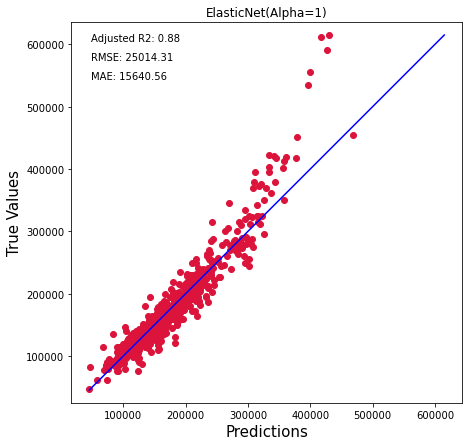

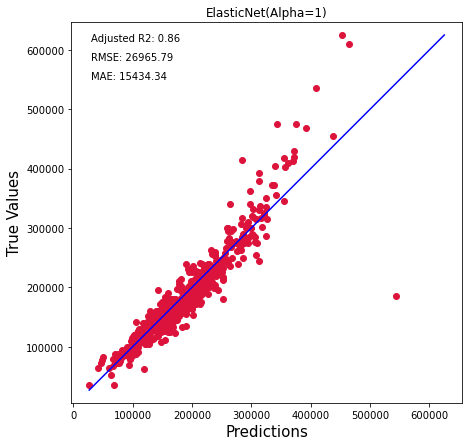

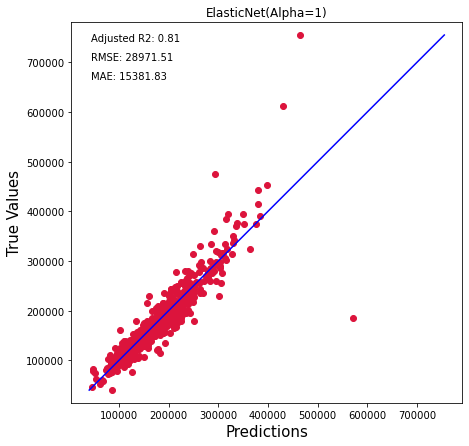

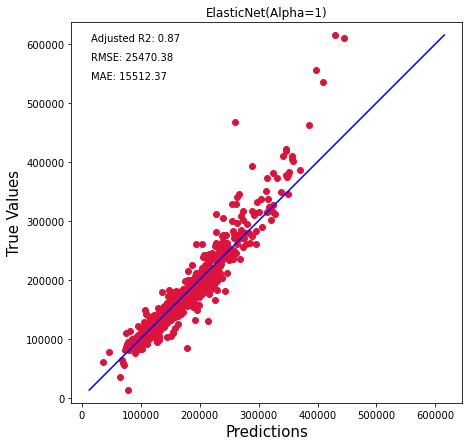

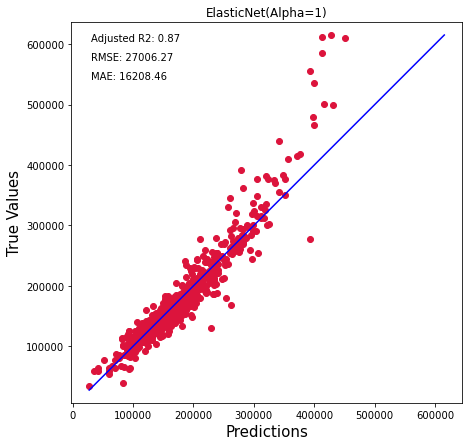

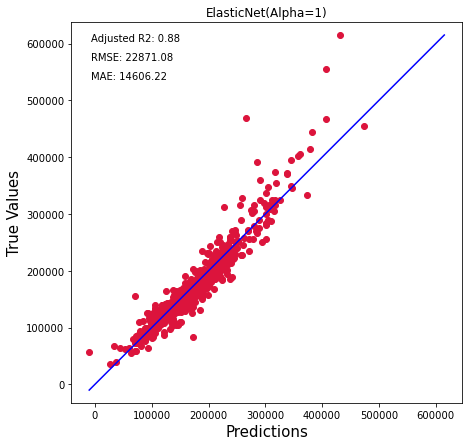

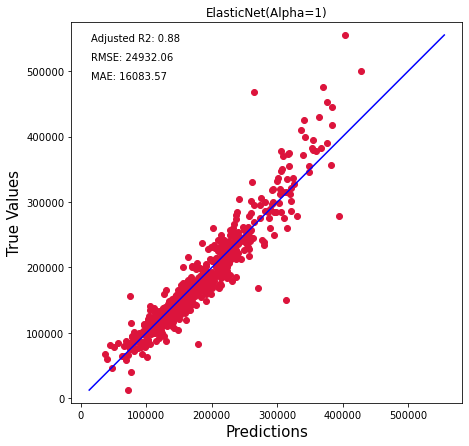

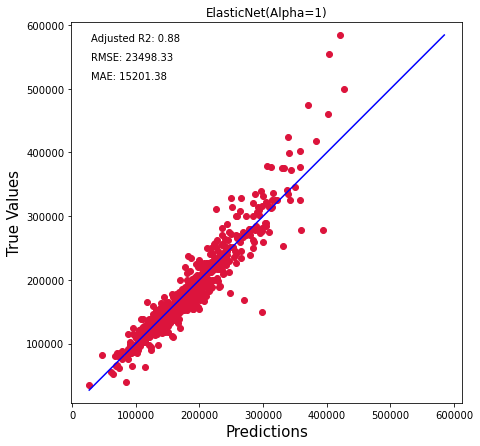

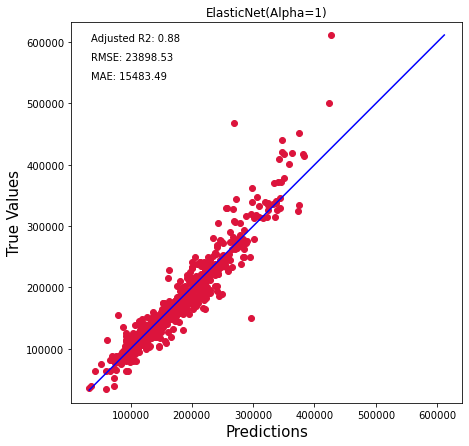

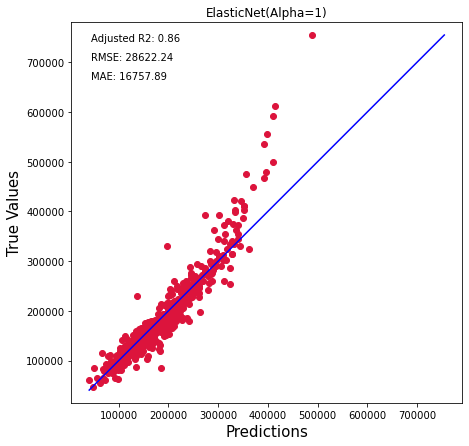

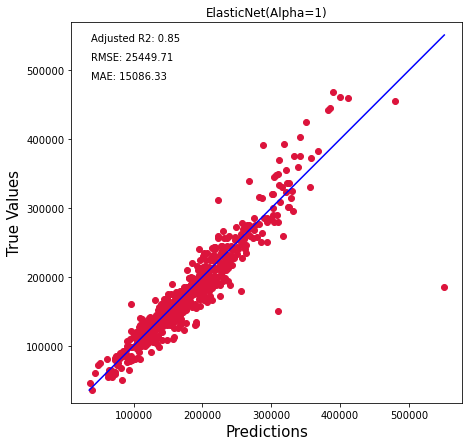

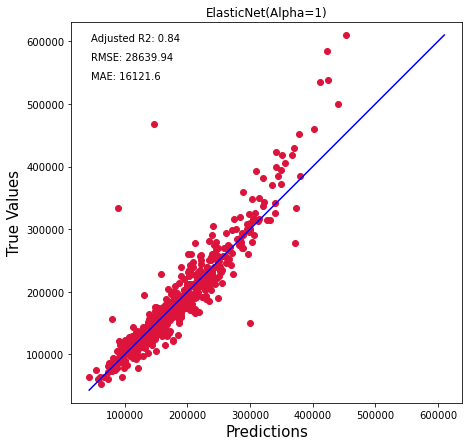

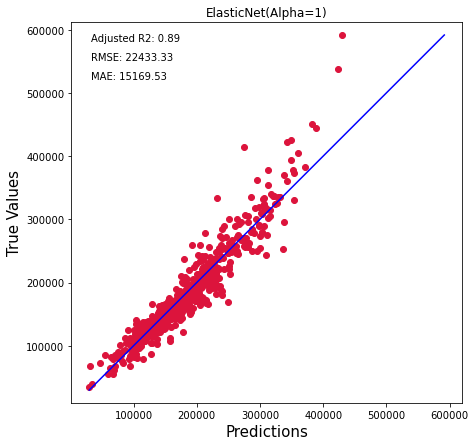

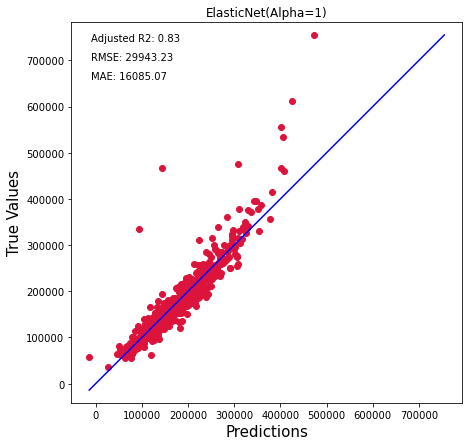

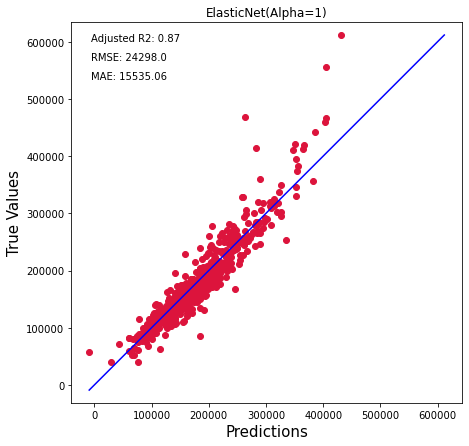

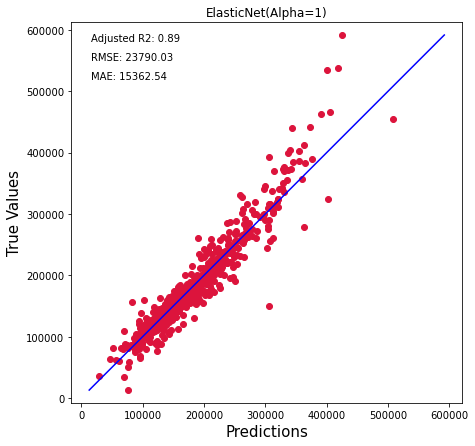

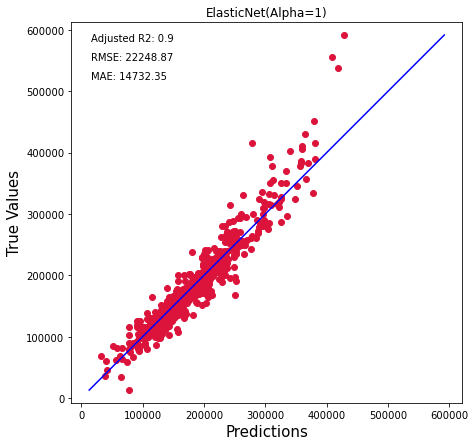

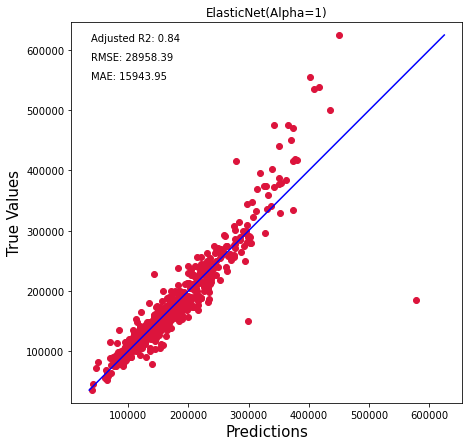

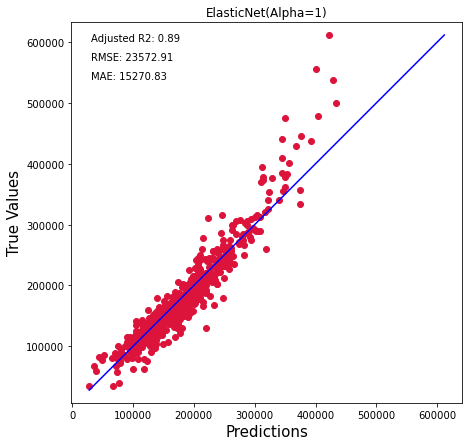

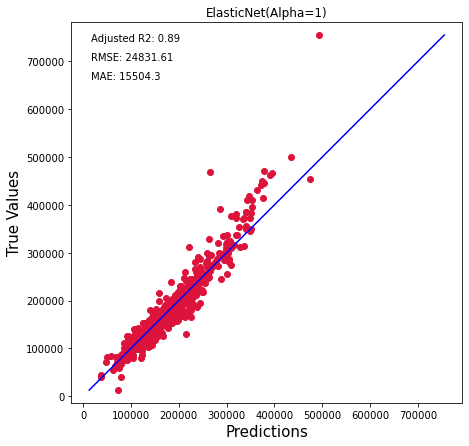

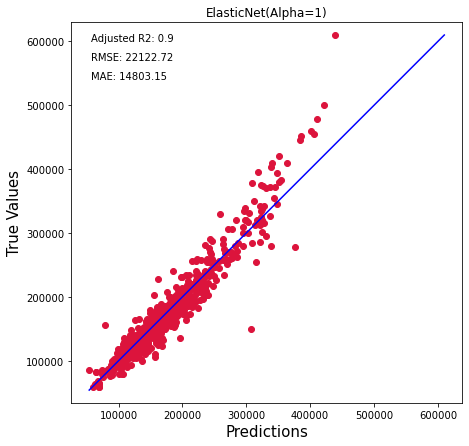

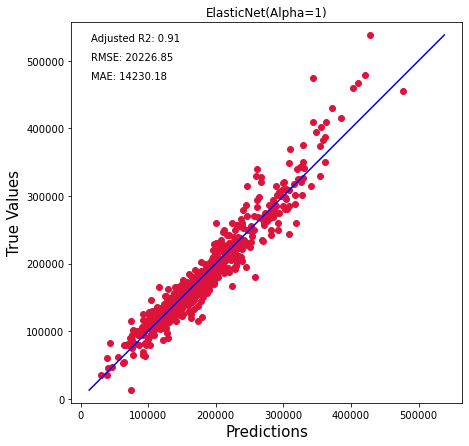

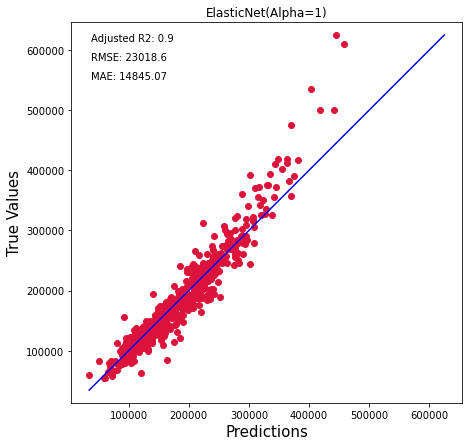

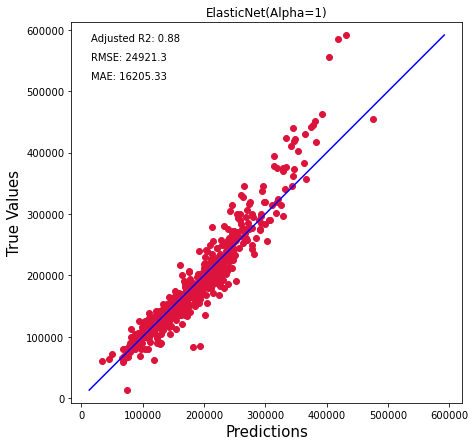

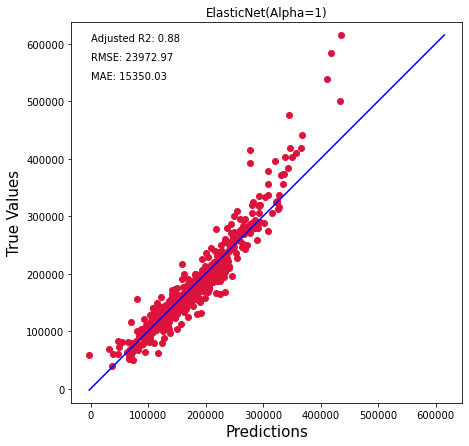

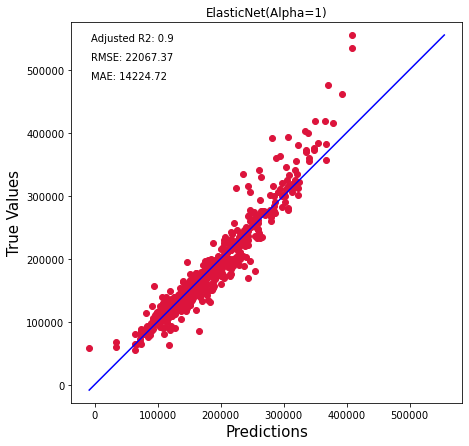

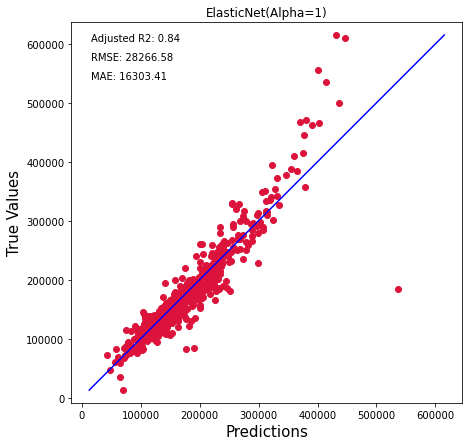

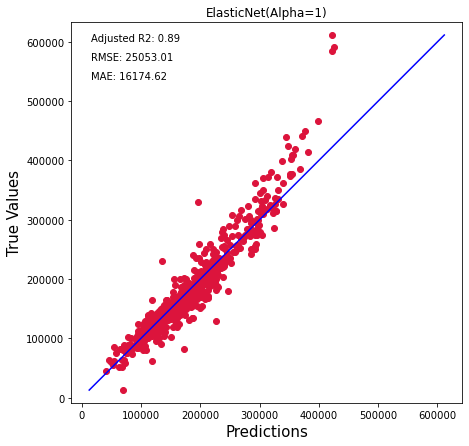

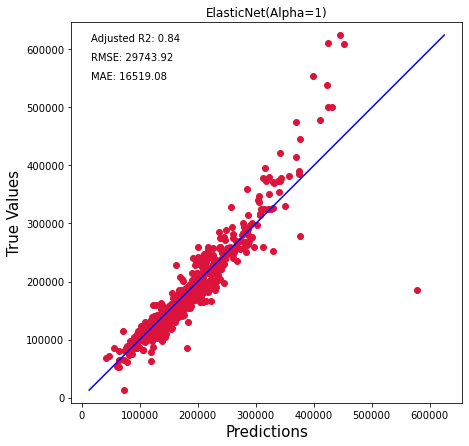

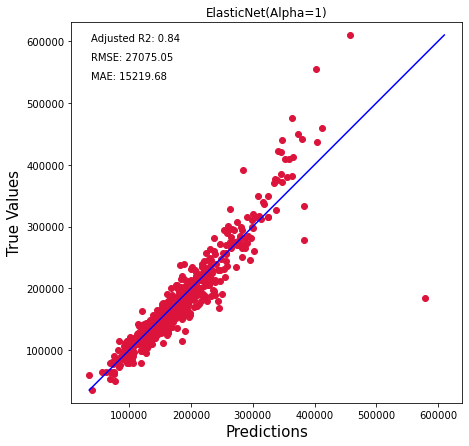

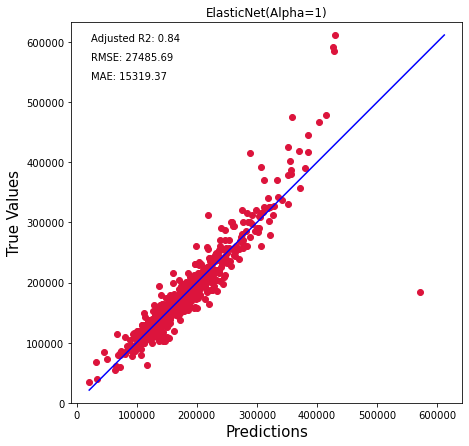

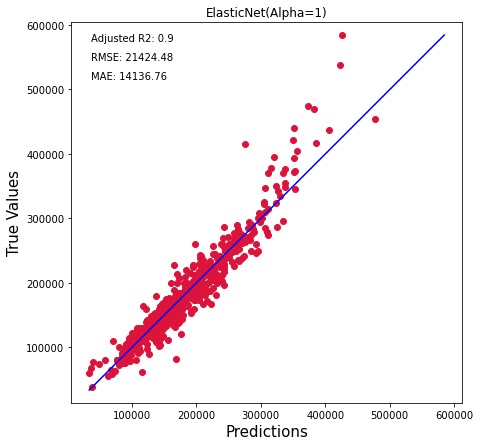

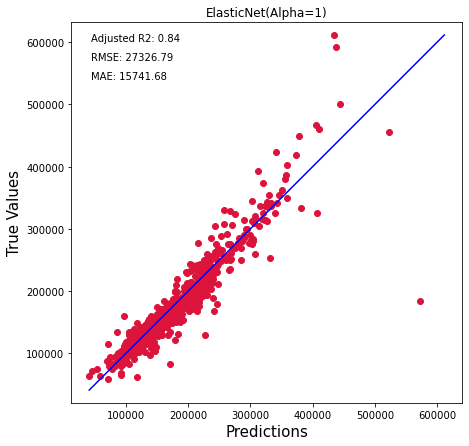

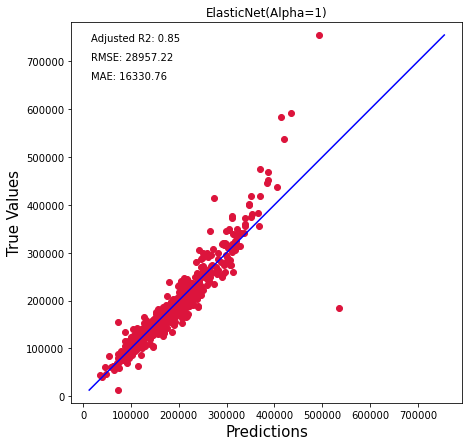

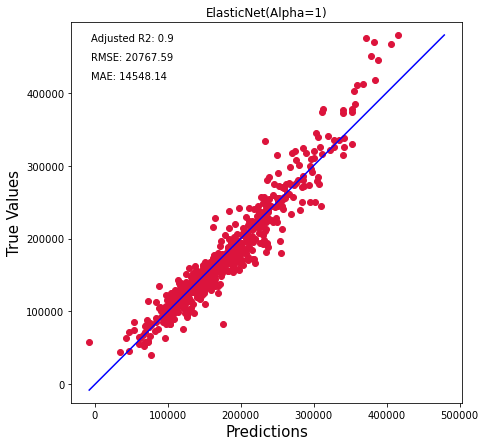

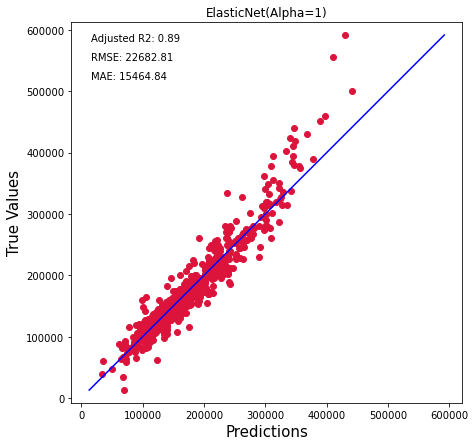

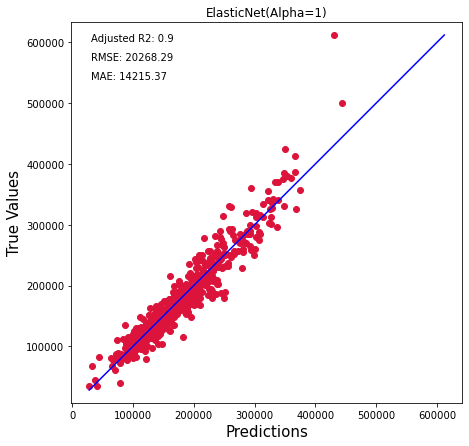

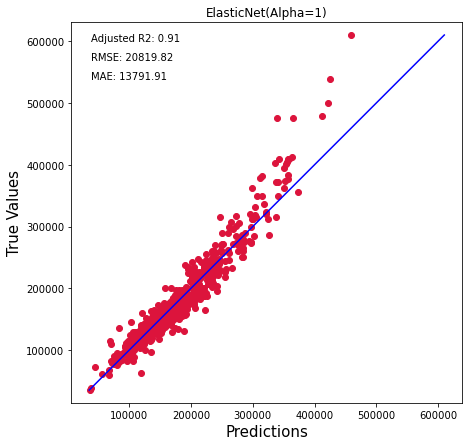

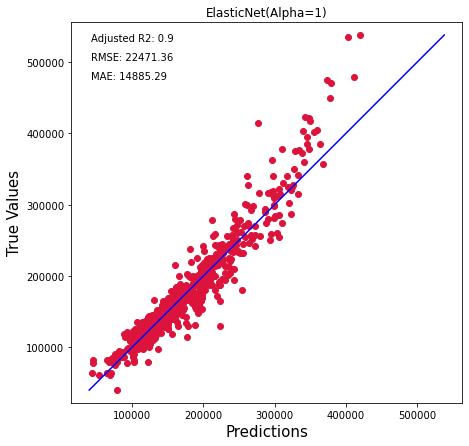

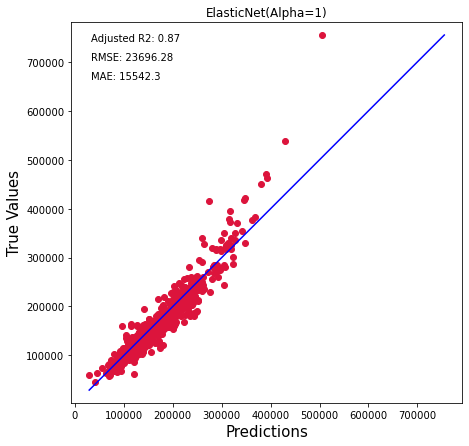

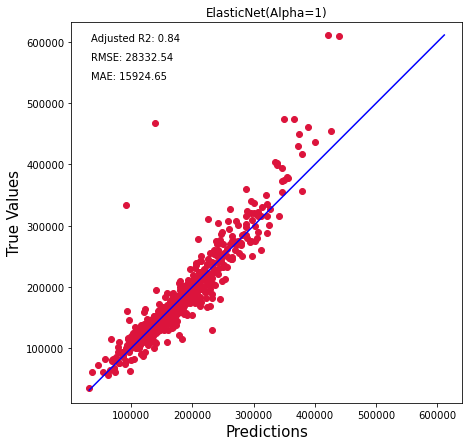

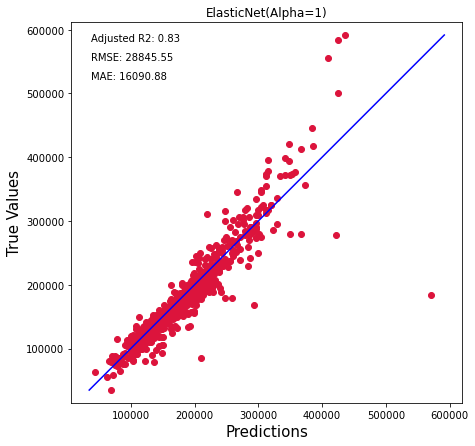

In [7]:
Scores = []
AdjR2 = []
MSE = []
RMSE = []
MAE = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    elastic = ElasticNet(alpha=1, l1_ratio=0.5)
    elastic.fit(X_train_scaled,Y_train)
    
    pred = elastic.predict(X_test_scaled)
    
    Elastic_Score = elastic.score(X_test_scaled, Y_test)
    
    Scores.append(Elastic_Score)
    
    Adj_r2 = 1 - (1-Elastic_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AdjR2.append(Adj_r2)
    
    mse = mean_squared_error(Y_test, pred)
    MSE.append(mse)
    
    rmse = np.sqrt(mse)
    RMSE.append(rmse)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE.append(mae)
    
    plt.figure(figsize=(7,7))
    plt.scatter(pred, Y_test, c='crimson')
    
    plt.title('ElasticNet(Alpha=1)')
    p1 = max(max(pred), max(Y_test))
    p2 = min(min(pred), min(Y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('Predictions', fontsize=15)
    plt.ylabel('True Values', fontsize=15)
    plt.axis('equal')
    plt.annotate('Adjusted R2: ' + str(round(Adj_r2,2)), xy=(0.05, 0.95), xycoords='axes fraction')
    plt.annotate('RMSE: ' + str(round(rmse,2)), xy=(0.05, 0.90), xycoords='axes fraction')
    plt.annotate('MAE: ' + str(round(mae,2)), xy=(0.05, 0.85), xycoords='axes fraction')
    plt.show()
    
    

In [8]:
combo = pd.DataFrame({'R_Squared': Scores, 'Adjusted_R2': AdjR2, 'Mean Squared Error': MSE,
                      'Root MSE': RMSE, 'Mean Absolute Error': MAE})

In [9]:
combo

,R_Squared,Adjusted_R2,Mean Squared Error,Root MSE,Mean Absolute Error
0,0.867425,0.850105,7.564505e+08,27503.645190,16323.556393
1,0.850190,0.830618,8.326740e+08,28856.091442,16097.114538
2,0.864630,0.846945,7.774891e+08,27883.491825,15680.104092
3,0.911230,0.899633,5.386603e+08,23209.055529,15177.085797
4,0.905476,0.893127,5.370286e+08,23173.878300,14976.284308
5,0.896506,0.882985,5.927005e+08,24345.441386,15831.356081
6,0.863989,0.846220,8.062621e+08,28394.755644,16263.972328
7,0.886752,0.871957,6.471707e+08,25439.549191,14943.918453
8,0.902689,0.889975,4.624290e+08,21504.162917,14603.578529
9,0.861077,0.842927,7.236670e+08,26901.060388,15361.620646


In [16]:
combo.to_csv('ElasticNet(Alpha=1).csv')

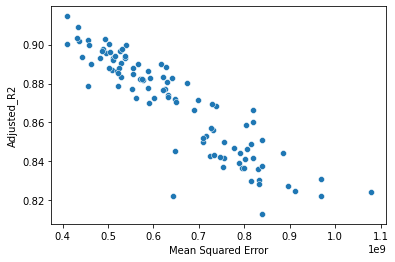

In [10]:
sns.scatterplot(data=combo, x='Mean Squared Error', y='Adjusted_R2'); 

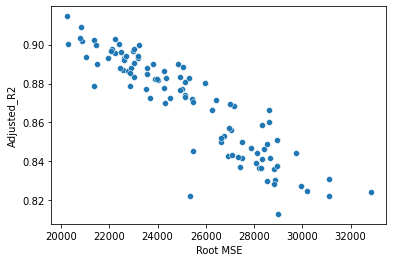

In [11]:
sns.scatterplot(data=combo, x='Root MSE', y='Adjusted_R2'); 

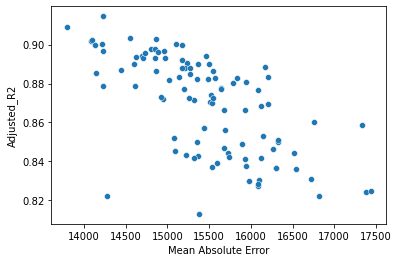

In [12]:
sns.scatterplot(data=combo, x='Mean Absolute Error', y='Adjusted_R2'); 

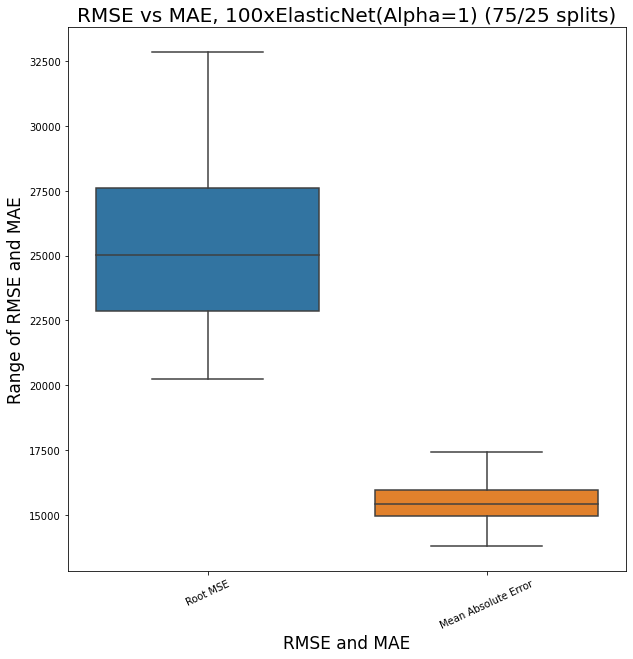

In [13]:
plt.figure(figsize=(10,10))
plt.title('RMSE vs MAE, 100xElasticNet(Alpha=1) (75/25 splits)', fontsize=20)
plt.ylabel('Range of RMSE and MAE', fontsize=17)
plt.xlabel('RMSE and MAE', fontsize=17)
sns.boxplot(data=combo[['Root MSE', 'Mean Absolute Error']])
plt.xticks(rotation=25);

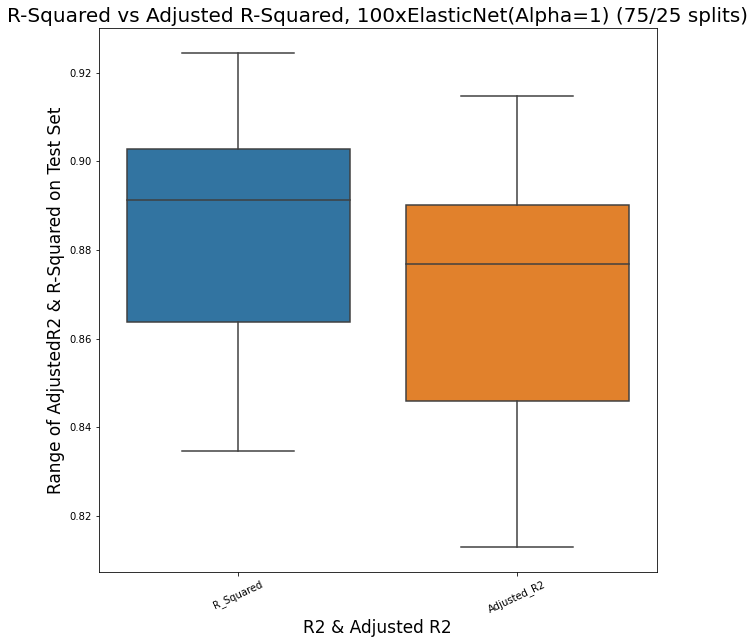

In [14]:
plt.figure(figsize=(10,10))
plt.title('R-Squared vs Adjusted R-Squared, 100xElasticNet(Alpha=1) (75/25 splits)', fontsize=20)
plt.ylabel('Range of AdjustedR2 & R-Squared on Test Set', fontsize=17)
plt.xlabel('R2 & Adjusted R2', fontsize=17)
sns.boxplot(data=combo[['R_Squared', 'Adjusted_R2']])
plt.xticks(rotation=25);

In [15]:
combo.describe()

,R_Squared,Adjusted_R2,Mean Squared Error,Root MSE,Mean Absolute Error
count,100.000000,100.000000,1.000000e+02,100.000000,100.000000
mean,0.884659,0.869590,6.468496e+08,25273.210373,15440.072663
std,0.022224,0.025127,1.471138e+08,2862.938477,755.940832
min,0.834628,0.813024,4.091256e+08,20226.852872,13791.909822
25%,0.863760,0.845961,5.233830e+08,22877.564964,14939.576822
50%,0.891150,0.876929,6.266846e+08,25033.661401,15408.086961
75%,0.902757,0.890053,7.617102e+08,27598.606849,15944.361361
max,0.924467,0.914599,1.079204e+09,32851.242434,17442.140893
